In [120]:
import numpy as np
%matplotlib inline

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from itertools import islice
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [123]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [124]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rotation_range = 10,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

In [125]:
train_data_dir = './'
batch_size = 16
img_height = 64
img_width = 64

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation')

Found 432 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


In [126]:
nb_epochs = 10
model.fit(train_generator,
          steps_per_epoch = train_generator.samples // batch_size,
          epochs = nb_epochs,
          validation_data = validation_generator,
          validation_steps = train_generator.samples // batch_size)

Epoch 1/10
27/27 [==============================] - 4s 118ms/step - loss: 0.0448 - accuracy: 0.9838 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 3s 101ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 3/10
27/27 [==============================] - 3s 111ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/10
27/27 [==============================] - 3s 109ms/step - loss: 8.4089e-04 - accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 3s 109ms/step - loss: 4.8434e-04 - accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 3s 107ms/step - loss: 7.0032e-05 - accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 3s 109ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 3s 100ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 3s 101ms/step - loss: 0.0023 - accuracy: 0.9977
Epoch 10/10
27/27 [===========================

In [127]:
X_test = []
y_test = []
for ts in islice(validation_generator, 50):
    X_test.append(ts[0])
    y_test.append(ts[1])

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [128]:
y_pred = model.predict_classes(X_test).ravel()

In [129]:
np.argwhere(y_test != y_pred).ravel()

array([], dtype=int64)

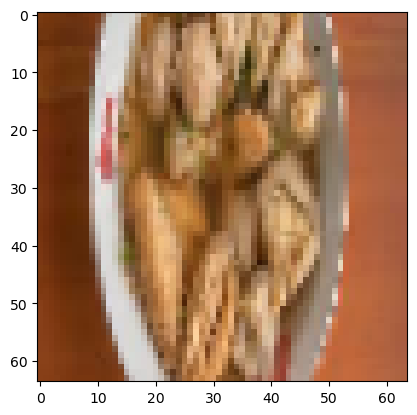

In [130]:
plt.imshow(X_test[14])